# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [136]:
import pandas as pd 
import numpy as np 

## Read in the file `craftcans.csv`, and look at the first first rows

In [137]:
df = pd.read_csv("craftcans.csv")

pd.set_option('display.max_columns', 200)

pd.set_option('display.max_rows', 200)

df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85


## How many rows do you have in the data? What are the column types?

In [138]:
df.info

<bound method DataFrame.info of                           Beer              Brewery         Location  \
0                 Get Together    NorthGate Brewing  Minneapolis, MN   
1                Maggie's Leap    NorthGate Brewing  Minneapolis, MN   
2                   Wall's End    NorthGate Brewing  Minneapolis, MN   
3                      Pumpion    NorthGate Brewing  Minneapolis, MN   
4                   Stronghold    NorthGate Brewing  Minneapolis, MN   
...                        ...                  ...              ...   
2411  Mama's Little Yella Pils  Oskar Blues Brewery     Longmont, CO   
2412        GUBNA Imperial IPA  Oskar Blues Brewery     Longmont, CO   
2413                  Old Chub  Oskar Blues Brewery     Longmont, CO   
2414         Gordon Ale (2009)  Oskar Blues Brewery     Longmont, CO   
2415           Dale's Pale Ale  Oskar Blues Brewery     Longmont, CO   

                               Style    Size    ABV IBUs  
0                       American IPA  16 oz.

In [220]:
df.shape

(2416, 7)

In [139]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [140]:
df.sort_values(by= "Brewery", ascending=False).head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1600,Wynkoop Pumpkin Ale,Wynkoop Brewing Company,"Denver, CO",Pumpkin Ale,12 oz.,5.50%,Does not apply
1978,B3K Black Lager,Wynkoop Brewing Company,"Denver, CO",Schwarzbier,12 oz.,5.50%,Does not apply
1308,Patty's Chile Beer,Wynkoop Brewing Company,"Denver, CO",Chile Beer,12 oz.,4.20%,Does not apply
1336,Colorojo Imperial Red Ale,Wynkoop Brewing Company,"Denver, CO",American Strong Ale,12 oz.,8.20%,Does not apply
2332,Rail Yard Ale (2009),Wynkoop Brewing Company,"Denver, CO",American Amber / Red Ale,12 oz.,5.20%,Does not apply
1610,Rocky Mountain Oyster Stout,Wynkoop Brewing Company,"Denver, CO",American Stout,12 oz.,7.50%,Does not apply
2286,Silverback Pale Ale,Wynkoop Brewing Company,"Denver, CO",American Pale Ale (APA),12 oz.,5.50%,40
1808,Rail Yard Ale,Wynkoop Brewing Company,"Denver, CO",American Amber / Red Ale,12 oz.,5.20%,Does not apply
1714,Belgorado,Wynkoop Brewing Company,"Denver, CO",Belgian IPA,12 oz.,6.70%,45
1149,Worthy IPA (2013),Worthy Brewing Company,"Bend, OR",American IPA,12 oz.,6.90%,69


## What is the most common ABV? (alcohol by volume)

In [141]:
df.ABV.value_counts().head(10)

5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
7.00%     92
4.50%     89
4.80%     72
5.60%     66
5.80%     66
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [142]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

In [143]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [144]:
df.ABV = df.ABV.str.replace('%', '')


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [145]:
df.ABV = df.ABV.astype(float)

In [146]:
df.ABV.mean()

5.977342419080068

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [147]:
df.ABV.mean()
df.ABV.mode()
df.ABV.median()

5.6

<AxesSubplot:>

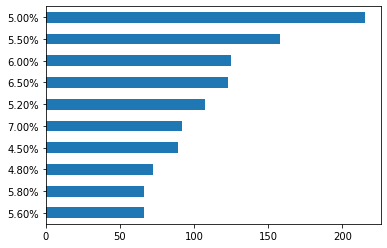

In [296]:
df.ABV.value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh')

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [149]:
df.ABV.isnull().value_counts()
#Missing for 68 beers

False    2348
True       68
Name: ABV, dtype: int64

In [150]:
df.ABV.dropna()
df.ABV.isnull().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [151]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [152]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most cans of beer?

In [153]:
df[df.Location == 'Brooklyn, NY'].sort_values(by= 'Brewery', ascending = False)




,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
1972,Resin,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.1,103
1970,Apollo,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Wheat Ale,16 oz.,5.2,11
2062,Diesel,Sixpoint Craft Ales,"Brooklyn, NY",American Stout,16 oz.,6.3,69
2074,Autumnation (2011-12) (2011),Sixpoint Craft Ales,"Brooklyn, NY",Pumpkin Ale,16 oz.,6.0,48
1836,Brownstone,Sixpoint Craft Ales,"Brooklyn, NY",American Brown Ale,16 oz.,5.9,47
1624,3Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,9.9,85
2140,The Crisp (2011),Sixpoint Craft Ales,"Brooklyn, NY",German Pilsener,16 oz.,5.4,42
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
2141,Sweet Action (2011),Sixpoint Craft Ales,"Brooklyn, NY",Cream Ale,16 oz.,5.2,34


## What are the five most popular styles of beer produced by Sixpoint?

In [156]:
df[df.Brewery == 'Sixpoint Craft Ales']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
1057,Global Warmer,Sixpoint Craft Ales,"Brooklyn, NY",American Strong Ale,12 oz.,7.0,70
1074,Autumnation (2013),Sixpoint Craft Ales,"Brooklyn, NY",American IPA,16 oz.,6.7,74
1267,The Crisp,Sixpoint Craft Ales,"Brooklyn, NY",German Pilsener,16 oz.,5.4,42


## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [205]:
df.Location.isnull().value_counts()
df = df.dropna(subset = ['Location'])
df[df.Location.str.contains('NY')== True]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.0,69
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.5,40
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.2,35


### Now *count* all of the breweries in New York state

In [182]:
df.Location.str.contains('NY').sum()

74

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [206]:
df[df.Style.str.contains('IPA') == True]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [211]:
df.IBUs.head(50)

0                 50
1                 26
2                 19
3                 38
4                 25
5                 47
6                 68
7                 80
8                 25
9                 42
10                25
11                21
12                13
13                17
14                68
15                38
16    Does not apply
17                65
18                20
19                18
20                15
21                80
22                65
23                45
24               100
25                85
26                24
27               100
28                30
29                28
30                19
31                16
32                17
33                42
34    Does not apply
35    Does not apply
36    Does not apply
37    Does not apply
38    Does not apply
39    Does not apply
40    Does not apply
41    Does not apply
42    Does not apply
43    Does not apply
44    Does not apply
45    Does not apply
46                75
47    Does no

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [217]:
df = pd.read_csv('craftcans.csv', na_values=['Does not apply'])

In [218]:
df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot:ylabel='Frequency'>

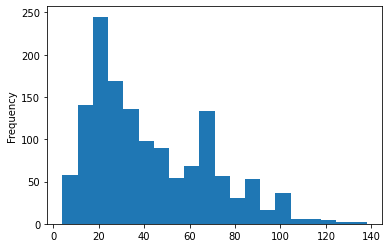

In [228]:
df.IBUs.plot.hist(bins = 20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [273]:
df.groupby('Beer').IBUs.quantile(0.75)

Beer
#001 Golden Amber Lager                    NaN
#002 American I.P.A.                      60.0
#003 Brown & Robust Porter                 NaN
#004 Session I.P.A.                       38.0
#9                                        20.0
                                          ... 
Zen                                       45.0
Zombie Monkie                             35.0
Zonker Stout                              36.0
oSKAr the G'Rauch                          NaN
the Kimmie, the Yink and the Holy Gose     NaN
Name: IBUs, Length: 2306, dtype: float64

## List all of the beers with IBUs below the 25th percentile

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

<AxesSubplot:ylabel='Style'>

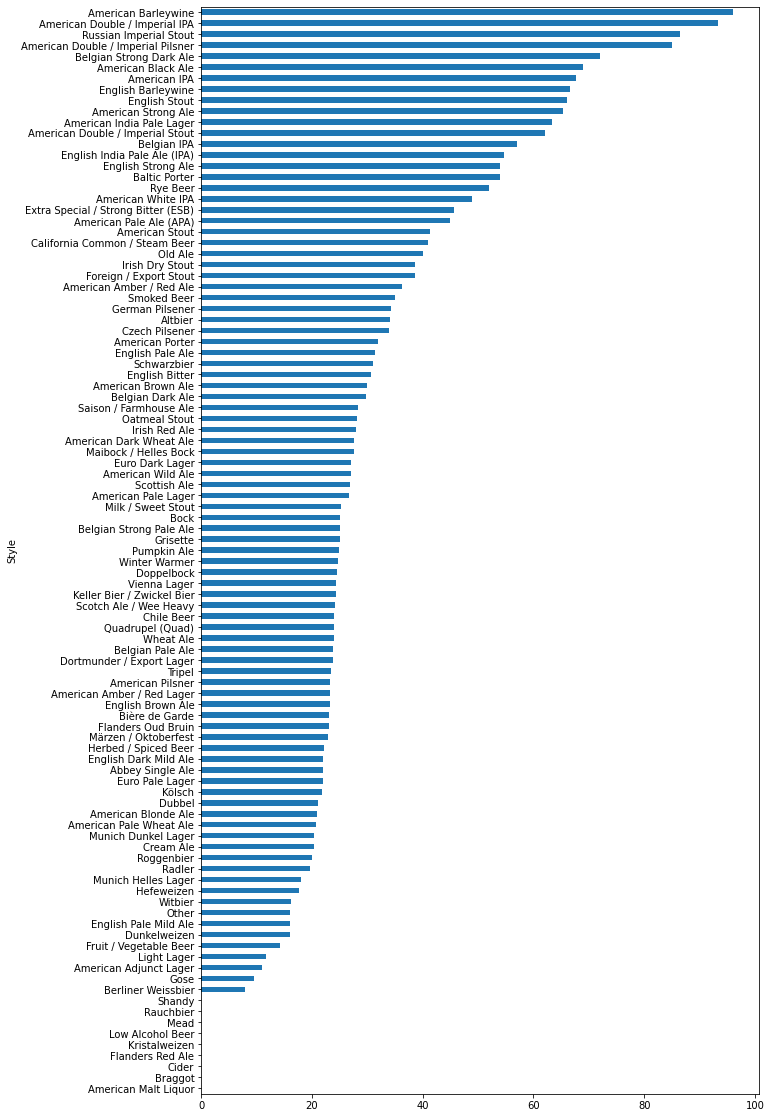

In [297]:
df.groupby("Style").IBUs.mean().sort_values(ascending = True,na_position ='first').plot(kind= 'barh', figsize=(10,20))

In [266]:

df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100.0
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85.0


## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [277]:

df.Style.value_counts()

American IPA                           424
American Pale Ale (APA)                245
American Amber / Red Ale               133
American Blonde Ale                    108
American Double / Imperial IPA         105
American Pale Wheat Ale                 97
American Brown Ale                      70
American Porter                         68
Saison / Farmhouse Ale                  52
Witbier                                 51
Fruit / Vegetable Beer                  49
Kölsch                                  42
Hefeweizen                              40
American Stout                          39
American Pale Lager                     39
Cider                                   37
German Pilsener                         36
American Black Ale                      36
Märzen / Oktoberfest                    30
Cream Ale                               29
American Amber / Red Lager              29
Czech Pilsener                          28
American Pilsner                        25
Belgian Pal

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [289]:
df[df.Style.isin(['Witbeier', 'Hefeweizen', 'American Pale Ale'])].IBUs.mean()

17.59259259259259

In [290]:
df[df.Style.isin(['Witbeier', 'Hefeweizen', 'American Pale Ale'])].IBUs.mean()

AttributeError: 'numpy.float64' object has no attribute 'plot'

## Draw a histogram of the IBUs of those beers

NameError: name 'df' is not defined

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!

If you made it this far you deserve a drink.